In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
# print(housing.data.shape)
# print(housing.target.shape)

In [8]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [10]:
# 多输入多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output, output2])
# 这样在网络结构部分就有了两个输出的网络结构

model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [11]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),
                    epochs=100,
                    callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 75us/sample - loss: 1.8955 - dense_2_loss: 0.7889 - dense_3_loss: 1.1060 - val_loss: 1.3121 - val_dense_2_loss: 0.5501 - val_dense_3_loss: 0.7619
Epoch 2/100
11610/11610 [==============================] - 0s 40us/sample - loss: 1.1268 - dense_2_loss: 0.4870 - dense_3_loss: 0.6398 - val_loss: 1.0304 - val_dense_2_loss: 0.4373 - val_dense_3_loss: 0.5930
Epoch 3/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.9982 - dense_2_loss: 0.4348 - dense_3_loss: 0.5634 - val_loss: 0.9730 - val_dense_2_loss: 0.4144 - val_dense_3_loss: 0.5586
Epoch 4/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.9163 - dense_2_loss: 0.4006 - dense_3_loss: 0.5156 - val_loss: 0.9353 - val_dense_2_loss: 0.4142 - val_dense_3_loss: 0.5210
Epoch 5/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.8777 - dense_2_loss: 0.3918 - dense

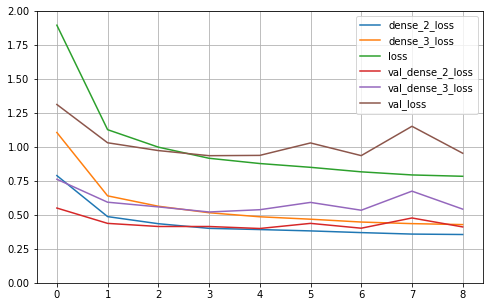

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
plot_learning_curves(history)

In [14]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

5160/5160 [==============================] - 0s 21us/sample - loss: 0.9603 - dense_2_loss: 0.4309 - dense_3_loss: 0.5326


[0.9603453163028688, 0.43093655, 0.5325812]